In [2]:
import pandas as pd
import os

In [3]:
os.chdir(os.path.dirname(os.path.dirname(os.getcwd())))
os.listdir(os.getcwd())

['code', 'team-info-page', 'README.md', 'deliverables', 'data']

In [3]:
l = list(os.listdir("data/Raw Data/"))

In [4]:
df_cs = pd.DataFrame()
cs = []
for i in l:
    if i.startswith("CS_"):
        df = pd.read_excel("data/Raw Data/"+i, thousands=',')
        df.columns = df.iloc[0]
        cols = []
        for j in df.columns:
            try:
                cols.append(str(int(j)))
            except:
                cols.append(j)
        df.columns = cols
        df = df[1:]
        for j in cols:
            if j not in ['District Name', 'District Code']:
                df[j] = df[j].fillna(0)
                df[j] = df[j].astype(float)
                df[j] = df[j].astype(int)
        df['Student Group'] = i.split("_")[2][:-5].replace(":","/")
        if i.split("_")[1]=='21':
            df['Year'] = 2021
        if i.split("_")[1]=='22':
            df['Year'] = 2022
        df_cs = df_cs.append(df)
        cs.append(df)
df_cs = df_cs.reset_index(drop = True)

In [5]:
df_cs_g = df_cs.groupby("Student Group").sum().reset_index()
df_y_cs_g = df_cs.groupby(['Year',"Student Group"]).sum().reset_index()

<AxesSubplot:xlabel='Student Group'>

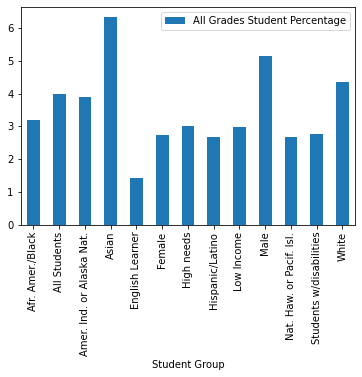

In [6]:
df_cs_g['All Grades Student Percentage'] = df_cs_g['All Grades']*100/df_cs_g['Total Students']
df_cs_g.plot.bar(x = "Student Group", y = 'All Grades Student Percentage')

Year
2021    AxesSubplot(0.125,0.125;0.775x0.755)
2022    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

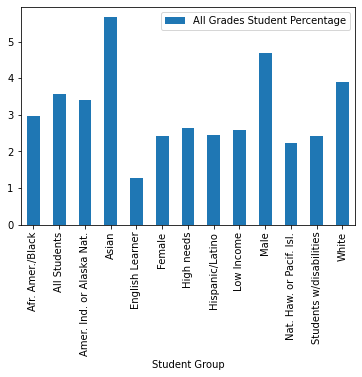

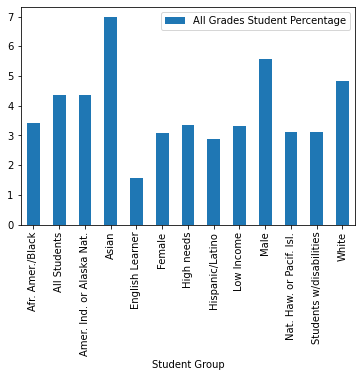

In [7]:
df_y_cs_g['All Grades Student Percentage'] = df_y_cs_g['All Grades']*100/df_y_cs_g['Total Students']
df_y_cs_g.groupby('Year').plot.bar(x = "Student Group", y = 'All Grades Student Percentage')

In [ ]:
df_cs.to_excel("data/CS_data_21_22.xlsx", index = False)